In [1]:
import os
import io
import argparse
import numpy as np
import copy
import pickle
import yaml
import cv2
import subprocess
import threading
import queue

In [7]:
DataFolder = "/home/yang/990Pro/scannet_seqs/data/val"
seqs_names = os.listdir(DataFolder)
seqs_uncertainty_range = {}

uncertainty_range = [10000, -10000]
seqs_check = []
for seq in seqs_names:
    seq_folder = os.path.join(DataFolder, seq)
    uncertainty_f = os.path.join(seq_folder, "orbslam", "inlier_num.txt")
    if not os.path.isfile(uncertainty_f):
        seqs_check.append(seq)
        continue
    uncertainty_arr = np.loadtxt(uncertainty_f)
    uncertainty_arr = uncertainty_arr[:,1]
    seq_mean = np.mean(uncertainty_arr) 
    seq_std = np.std(uncertainty_arr) 
    seq_min = np.min(uncertainty_arr) 
    seq_max = np.max(uncertainty_arr) 
    seqs_uncertainty_range[seq] = [seq_mean, seq_std]
    
    uncertainty_range[0] = min(uncertainty_range[0], seq_min)
    uncertainty_range[1] = max(uncertainty_range[1], seq_max)

In [17]:
DataFolder = "/home/yang/990Pro/scannet_seqs/data/val"
seqs_names = os.listdir(DataFolder)
seqs_uncertainty_range = {}

uncertainty_range = [10000, -10000]
seqs_check = []
seq = "scene0030_02"

seq_folder = os.path.join(DataFolder, seq)
inlier_uncertainty_f = os.path.join(seq_folder, "orbslam", "inlier_num.txt")
inlier_uncertainty_arr = np.loadtxt(inlier_uncertainty_f)
inlier_uncertainty = inlier_uncertainty_arr[:,1]
inlier__mean = np.mean(inlier_uncertainty) 
inlier__std = np.std(inlier_uncertainty) 
inlier__min = np.min(inlier_uncertainty) 
inlier__max = np.max(inlier_uncertainty) 
inlier_uncertainty = inlier_uncertainty/(inlier__mean)
inlier_frame_idxs = inlier_uncertainty_arr[:,0]

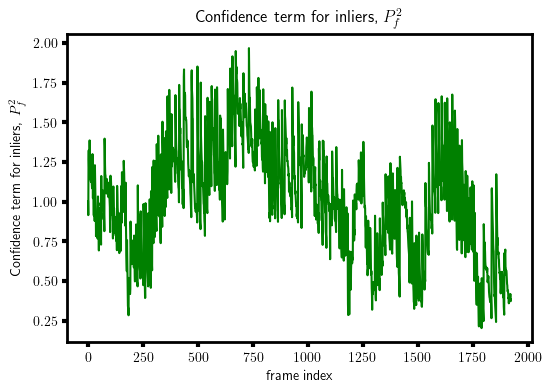

In [33]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['text.usetex'] = True


fig, ax = plt.subplots(figsize=(6, 4))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
# increase tick width
ax.tick_params(width=3)
inlier_uncertainty[0] = 1
ax.plot(inlier_frame_idxs, inlier_uncertainty, color = 'green')
ax.set_xlabel('frame index')
ax.set_ylabel(r'Confidence term for inliers, $P^2_f$')
ax.set_title(r'Confidence term for inliers, $P^2_f$')
fig.savefig("/home/yang/toolbox/meeting/Final/images/pose_confidence/inlier.png")

In [20]:
seq_folder = os.path.join(DataFolder, seq)
jacobian_uncertainty_f = os.path.join(seq_folder, "orbslam", "uncertainty.txt")
jacobian_uncertainty_arr = np.loadtxt(jacobian_uncertainty_f)
jacobian_uncertainty = jacobian_uncertainty_arr[:,1]
jacobian__mean = np.mean(jacobian_uncertainty) 
jacobian__std = np.std(jacobian_uncertainty) 
jacobian__min = np.min(jacobian_uncertainty) 
jacobian__max = np.max(jacobian_uncertainty) 
jacobian_uncertainty = jacobian_uncertainty/(jacobian__mean)
jacobian_frame_idxs = jacobian_uncertainty_arr[:,0]

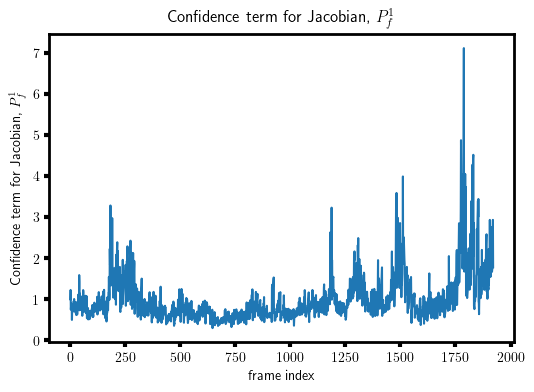

In [30]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['text.usetex'] = True


fig, ax = plt.subplots(figsize=(6, 4))
jacobian_uncertainty[0] = 1
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
# increase tick width
ax.tick_params(width=3)
ax.plot(jacobian_frame_idxs, jacobian_uncertainty)
ax.set_xlabel('frame index')
ax.set_ylabel(r'Confidence term for Jacobian, $P^1_f$')
ax.set_title(r'Confidence term for Jacobian, $P^1_f$')
fig.savefig("/home/yang/toolbox/meeting/Final/images/pose_confidence/jacobian.png")

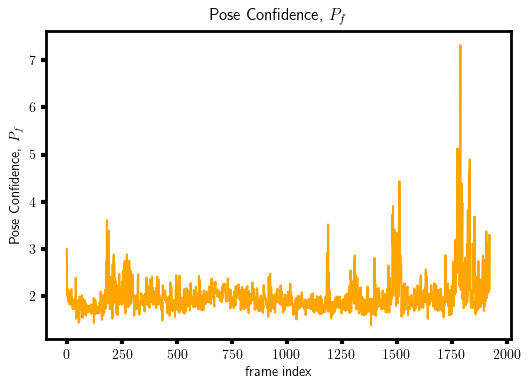

In [34]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['text.usetex'] = True


fig, ax = plt.subplots(figsize=(6, 4))
jacobian_uncertainty[0] = 2
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
# increase tick width
ax.tick_params(width=3)
ax.plot(jacobian_frame_idxs, jacobian_uncertainty+ inlier_uncertainty, color = 'orange')
ax.set_xlabel('frame index')
ax.set_ylabel(r'Pose Confidence, $P_f$')
ax.set_title(r'Pose Confidence, $P_f$')
fig.savefig("/home/yang/toolbox/meeting/Final/images/pose_confidence/confidence.png")